In [12]:
# %time
import pandas as pd
import matplotlib.pyplot as plt
import numpy
######ASk ve Bid listlerindeki her bir componenti ayrı bir kolona alır
data=pd.read_json("lob74196.json")
ask1=[]
volask1=[]
bid1=[]
volbid1=[]
ask2=[]
volask2=[]
bid2=[]
volbid2=[]
ask3=[]
volask3=[]
bid3=[]
volbid3=[]
ask4=[]
volask4=[]
bid4=[]
volbid4=[]
ask5=[]
volask5=[]
bid5=[]
volbid5=[]
c=0
tahtaa=[ask1,volask1,ask2,volask2,ask3,volask3,ask4,volask4,ask5,volask5]

for i in range(len(data["Ask"])):
    for j in range(len(data["Ask"][i])):
         for k in range(len(data["Ask"][i][j])):
                cg=c%10
                tahtaa[cg].append(data["Ask"][i][j][k])
                c=c+1
d=0

tahtab=[bid1,volbid1,bid2,volbid2,bid3,volbid3,bid4,volbid4,bid5,volbid5]
for i in range(len(data["Bid"])):
    for j in range(len(data["Bid"][i])):
         for k in range(len(data["Bid"][i][j])):                
                dg=d%10
                tahtab[dg].append(data["Bid"][i][j][k])
                d=d+1
                      
                #print(data["Ask"][i][j][k],"\n-------")
    #ask1.append(data[])
    #volask1.append(ts[0][0][1])
dft=pd.DataFrame({"ASK1":ask1,"VOLASK1":volask1,"ASK2":ask2,"VOLASK2":volask2,"ASK3":ask3,"VOLASK3":volask3,"ASK4":ask4,"VOLASK4":volask4,"ASK5":ask5,"VOLASK5":volask5,"BID1":bid1,"VOLBID1":volbid1,"BID2":bid2,"VOLBID2":volbid2,"BID3":bid3,"VOLBID3":volbid3,"BID4":bid4,"VOLBID4":volbid4,"BID5":bid5,"VOLBID5":volbid5})    
######################################################################################################################################################
###########MEsajlar bolumndekı gelen market orderları ayırır ve summarize eder (SaTIS /ALIS Nominalleri ,emir sayıları,Emir adetleri)
arraybuy=[]
arraysell=[]
tekarray=[]
for j in range(len(data["Messages"])):
    SumEB=0
    SumES=0
    NomEB=0
    NomES=0
    cseb=0
    cses=0
    for i in range(len(data["Messages"][j])):
        if data["Messages"][j][i][0]=="E":
            if data["Messages"][j][i][1]=="B":
                cseb=cseb+1
                SumEB=SumEB+data["Messages"][j][i][3]
                NomEB=NomEB+(data["Messages"][j][i][2]*data["Messages"][j][i][3])       
            
            if data["Messages"][j][i][1]=="S":
                cses=cses+1
                SumES=SumES+data["Messages"][j][i][3] 
                NomES=NomES+(data["Messages"][j][i][2]*data["Messages"][j][i][3])
    #["B",cseb,SumEB,NomEB]##yemirönü ,kaç emir geldi ,kac qty,kac nominal
    #["S",cses,SumES,NomES]##yemirönü ,kaç emir geldi ,kac qty,kac nominal
    BS=[cseb,SumEB,NomEB,cses,SumES,NomES,data["TimeStamp"][j]]
    tekarray.append(BS)
############ASK BID MESSAGE ve TIME STAMP bolumlerını componentlerıne ayrılmıs bır sekılde tek dataframede toplar##################################################    
df=pd.DataFrame(tekarray)
df.columns=["BCount","BQty","BNOM","SCount","SQty","SNOM","TimeStamp"]
Data=dft.assign(BCount=df["BCount"],BQty=df["BQty"],BNOM=df["BNOM"],SCount=df["SCount"],SQty=df["SQty"],SNOM=df["SNOM"],TimeStamp=df["TimeStamp"])
#######################################################################################################################################
##################MID PRICE,TAHTA NIN BUY SELL NEUTRAL DURUMLARINI TEMSIL EDEN ORANLARI  HESAPLAR
DataVB=pd.DataFrame()
Data=Data.assign(MID=(Data["ASK1"]+Data["BID1"])/2)
DataVB=DataVB.assign(VB=Data["VOLASK1"]+Data["VOLASK2"]+Data["VOLASK3"]+Data["VOLASK4"]+Data["VOLASK5"])  
DataV=DataVB.assign(VS=Data["VOLBID1"]+Data["VOLBID2"]+Data["VOLBID3"]+Data["VOLBID4"]+Data["VOLBID5"])
DataV=DataV.assign(SNB=( (DataV["VB"]-DataV["VS"]) / (DataV["VB"]+DataV["VS"]) ) )
Data=Data.assign(BNS =DataV["SNB"],VB1=DataV["VB"],VS1=DataV["VS"])   
del DataVB
del DataV
del dft
del df
arraybuy=[]
arraysell=[]
tekarray=[]
data=[]
tahtaa=[]
tahtab=[]
Data=Data.sort_values(by=['TimeStamp'])

##################tİME sTAMPLERİ MİLİSECONDA DÖNÜŞTÜRÜR
ms=0
Msar=[]
t=0
dData=pd.DataFrame()
for i in Data["TimeStamp"]:
    t=i-Data["TimeStamp"][0]
    ms=numpy.timedelta64(t,'ms')
    Msar.append(ms)
Data=Data.assign(MiliSec=Msar)    

Msar=[]


Data.loc[Data.SQty >0, 'sMSEC'] = Data["MiliSec"]
Data.loc[Data.SQty <=0, 'sMSEC'] = numpy.timedelta64(0,'ms')
seri=[]
for i in range(len(Data)):
    seri.append(i)
Data=Data.assign(ind=seri)    
seri=[]

In [13]:
Data.columns

Index(['ASK1', 'VOLASK1', 'ASK2', 'VOLASK2', 'ASK3', 'VOLASK3', 'ASK4',
       'VOLASK4', 'ASK5', 'VOLASK5', 'BID1', 'VOLBID1', 'BID2', 'VOLBID2',
       'BID3', 'VOLBID3', 'BID4', 'VOLBID4', 'BID5', 'VOLBID5', 'BCount',
       'BQty', 'BNOM', 'SCount', 'SQty', 'SNOM', 'TimeStamp', 'MID', 'BNS',
       'VB1', 'VS1', 'MiliSec', 'sMSEC', 'ind'],
      dtype='object')

In [16]:
########Sell Orderların Geliş Zamanları MiliSecond Cinsinden
c=0
a1=[]
a1array=[]
t=numpy.timedelta64(0,'ms')
t2=numpy.timedelta64(10,'ms')
for i in Data["sMSEC"]:
    if i>t:
        a1=[i,c]
        #print(a1)
        a1array.append(a1)    
    c=c+1    

 

In [17]:

###### Satış Emri Gelen tickerlden sonra ki 10 mili saniye içinde fiyat 
# neredeyse satıs emrinin geldiği satıra CP kolonuna Mid Price ı Yazar
tt=numpy.timedelta64(10,'ms')
close=[]
closearray=[]
for i,k in a1array:
    cc=0
    ca=0
    for j in Data["MiliSec"][k:]:
        ca=ca+1
        ck=k+ca
        if j>i+tt and cc==0 :
            close=[Data["MID"][ck-1],k]
            # print(i,j,j-i,k,Data["MID"][ck-1],ck-1)
            cc=1
            break
    closearray.append(close) 
ca=[]
for i,j in closearray:
    ca.append(i)
####mıd prıcedakı degısımı bulur ve DELTA KOLONUNA YAZAR    
df=Data.query("SQty>0")
df=df.assign(CP=ca)
df=df.assign(Delta=((df["MID"]-df["CP"])))    
ca=[]
c=0
a1=[]
a1array=[]    

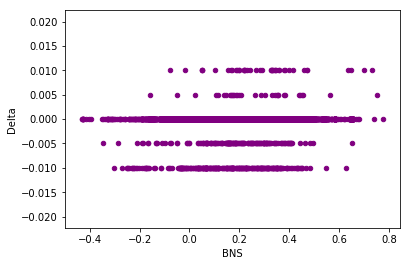

In [18]:
####BNS>>>> BUY(>0.33) -NEUTRAL(<=-0.33 &  >=0.33)- SELL(<-0.33) DUrumlarını Temsıl EDER
####DELTA>>> MID PRICE Degişimlerini Temsileder(KURUS CINSINDEN)
### Tahtanın Buy-Neutral-Sell Durumlarında gelen satıs emirlerinden sonra MİD price  kac kurus hareket etmiş oldugunu gosterıyor
df.plot(kind='scatter',x='BNS',y='Delta',color='purple',stacked=True)

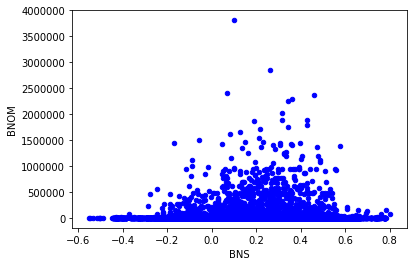

In [19]:
####BNS>>>> BUY(>0.33) -NEUTRAL(<=-0.33 &  >=0.33)- SELL(<-0.33) DUrumlarını Temsıl EDER
#########BNOM>>> GELEN ALIS EMIRLERININ NOMINALINI TEMSIL EDER
##### Tahtanın Buy-Neutral-Sell Durumlarında gelen <<<ALIŞ>>> emirlerin Nominal Değerlerinin Dağılımları
Data.plot(kind='scatter',x='BNS',y='BNOM',color='blue',stacked=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

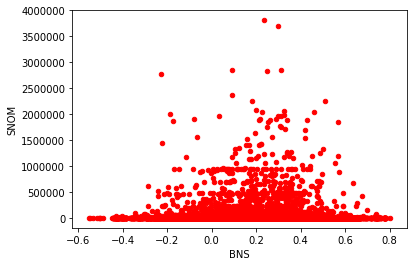

In [20]:
####BNS>>>> BUY(>0.33) -NEUTRAL(<=-0.33 &  >=0.33)- SELL(<-0.33) DUrumlarını Temsıl EDER
#########SNOM>>> GELEN SATIS EMIRLERININ NOMINALINI TEMSIL EDER
##### Tahtanın Buy-Neutral-Sell Durumlarında gelen <<<SATIŞ>>> emirlerin Nominal Değerlerinin Dağılımları
Data.plot(kind='scatter',x='BNS',y='SNOM',color='red',stacked=True)
plt.show